In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df=pd.read_csv("Bengaluru_House_Data[1].csv")
print(df.head(4))

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  


In [3]:
print(df.columns)

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [8]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [10]:
df1=df[['price','bath','total_sqft','location','size']]
df1.head()

,price,bath,total_sqft,location,size
0,39.07,2.0,1056,Electronic City Phase II,2 BHK
1,120.00,5.0,2600,Chikka Tirupathi,4 Bedroom
2,62.00,2.0,1440,Uttarahalli,3 BHK
3,95.00,3.0,1521,Lingadheeranahalli,3 BHK
4,51.00,2.0,1200,Kothanur,2 BHK


In [12]:
df1.isnull().sum()

price          0
bath          73
total_sqft     0
location       1
size          16
dtype: int64

In [14]:
df1.dropna(inplace=True)

In [16]:
df1.isnull().sum()

price         0
bath          0
total_sqft    0
location      0
size          0
dtype: int64

In [20]:
df1["size"].unique

<bound method Series.unique of 0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13246, dtype: object>

In [26]:
# cleaning size column
df1["BHK"]=df1["size"].apply(lambda x: int(x.split(' ')[0]))

In [37]:
df1.shape

(13246, 6)

In [45]:
# df1.total_sqft[30:50]

30    2100 - 2850
31           1075
32           1760
33           1693
34           1925
35            700
36           1070
37           1724
38           1290
39           1143
40           1296
41           1254
42            600
43            660
44        1330.74
45            600
46            970
47           1459
48            800
49            869
Name: total_sqft, dtype: object

In [55]:
# cleaning the total_sqft column
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [60]:
df1[~df1['total_sqft'].apply(is_float)]

,price,bath,total_sqft,location,size,BHK
30,186.000,4.0,2100 - 2850,Yelahanka,4 BHK,4
122,477.000,4.0,3067 - 8156,Hebbal,4 BHK,4
137,54.005,2.0,1042 - 1105,8th Phase JP Nagar,2 BHK,2
165,43.490,2.0,1145 - 1340,Sarjapur,2 BHK,2
188,56.800,2.0,1015 - 1540,KR Puram,2 BHK,2
...,...,...,...,...,...,...
12975,38.190,2.0,850 - 1060,Whitefield,2 BHK,2
12990,122.000,3.0,1804 - 2273,Talaghattapura,3 BHK,3
13059,72.760,2.0,1200 - 1470,Harlur,2 BHK,2
13265,59.135,2.0,1133 - 1384,Hoodi,2 BHK,2


In [64]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [68]:
df2 = df1.copy()
df2.total_sqft = df2.total_sqft.apply(convert_sqft_to_num)
df2 = df2[df2.total_sqft.notnull()]
df2.head(2)

,price,bath,total_sqft,location,size,BHK
0,39.07,2.0,1056.0,Electronic City Phase II,2 BHK,2
1,120.00,5.0,2600.0,Chikka Tirupathi,4 Bedroom,4


In [72]:
df3 = df2.copy()
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head()

,price,bath,total_sqft,location,size,BHK,price_per_sqft
0,39.07,2.0,1056.0,Electronic City Phase II,2 BHK,2,3699.810606
1,120.00,5.0,2600.0,Chikka Tirupathi,4 Bedroom,4,4615.384615
2,62.00,2.0,1440.0,Uttarahalli,3 BHK,3,4305.555556
3,95.00,3.0,1521.0,Lingadheeranahalli,3 BHK,3,6245.890861
4,51.00,2.0,1200.0,Kothanur,2 BHK,2,4250.000000


In [77]:
df3.to_csv("bhp.csv",index=False)

In [82]:
#  Dealing with the llocation columns 
df3.location = df3.location.apply(lambda x: x.strip())
location_stats = df3['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [96]:
len(df3.location.unique())

1287

In [87]:
# creating a column to store locations that has less than 10 apearances 
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [99]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.location.unique())

241

In [102]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4 = remove_pps_outliers(df3)
df4.shape

(11434, 7)

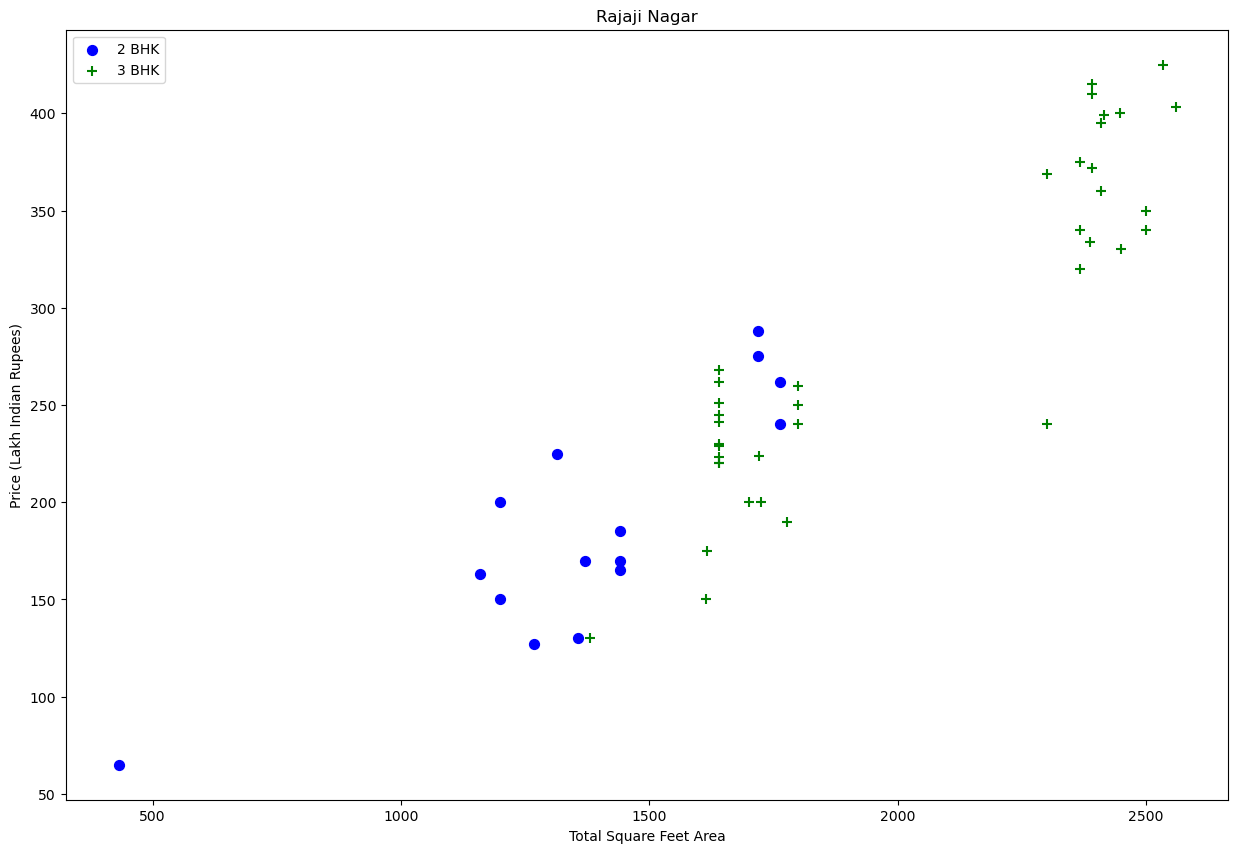

In [111]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"Rajaji Nagar")

In [119]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for BHK, bhk_df in location_df.groupby('BHK'):
            bhk_stats[BHK] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for BHK, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df4)
# df8 = df7.copy()
df8.shape

(7992, 7)

In [128]:
df8[df8.bath>df8.BHK+2]

,price,bath,total_sqft,location,size,BHK,price_per_sqft
1635,230.0,9.0,1500.0,Chamrajpet,6 Bedroom,6,15333.333333
1771,80.0,7.0,2460.0,Chikkabanavar,4 Bedroom,4,3252.032520
5604,450.0,8.0,7000.0,Nagasandra,4 Bedroom,4,6428.571429
7229,116.0,6.0,1806.0,Thanisandra,3 BHK,3,6423.034330
8808,500.0,14.0,3300.0,other,9 Bedroom,9,15151.515152
9003,120.0,12.0,990.0,other,8 Bedroom,8,12121.212121
10308,300.0,12.0,1850.0,other,8 Bedroom,8,16216.216216
10693,775.0,6.0,2400.0,other,3 Bedroom,3,32291.666667
11371,3600.0,13.0,7150.0,other,10 Bedroom,10,50349.650350


In [136]:
df9 = df8[df8.bath<df8.BHK+2]
df9.shape

(7891, 7)

In [146]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,price,bath,total_sqft,location,BHK
0,428.0,4.0,2850.0,1st Block Jayanagar,4
1,194.0,3.0,1630.0,1st Block Jayanagar,3
2,125.0,6.0,1200.0,1st Block Jayanagar,6


In [148]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [151]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,price,bath,total_sqft,location,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,428.0,4.0,2850.0,1st Block Jayanagar,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,194.0,3.0,1630.0,1st Block Jayanagar,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,125.0,6.0,1200.0,1st Block Jayanagar,6,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,235.0,2.0,1875.0,1st Block Jayanagar,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,85.0,4.0,930.0,1st Block Jayanagar,7,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [154]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,price,bath,total_sqft,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,428.0,4.0,2850.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,194.0,3.0,1630.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [159]:
# BUILDING THE MODEL FOR THE PROJECT 

In [162]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,bath,total_sqft,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,2850.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,1630.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6.0,1200.0,6,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [165]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    125.0
Name: price, dtype: float64

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [182]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.67475317, 0.75657269, 0.68916603, 0.60986111, 0.65557672])

In [187]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.677186,{}
1,lasso,0.590701,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.441098,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [189]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [200]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

-211.25137815777575

In [204]:
import pickle
with open('my banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [210]:
df12.columns

Index(['price', 'bath', 'total_sqft', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [208]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("model columns.json","w") as f:
    f.write(json.dumps(columns))